## Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and
rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling 
online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount,
Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that 
are eligible for loan amount so that they can specifically target these customers. 



#### Import data

In [25]:
import pandas as pd
train = pd.read_csv(r'C:\Users\Prasad\Downloads\train_ctrUa4K.csv')
test = pd.read_csv(r'C:\Users\Prasad\Downloads\test_lAUu6dG.csv')
data = train.append(test)
data.head()

C:\Users\Prasad\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [26]:
#join data
print(train.shape)
print(test.shape)
print(data.shape)

(614, 13)
(367, 12)
(981, 13)


In [27]:
#importing libraries
import numpy as np
import pandas as pd
from math import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib as plt
from sklearn.metrics import mean_squared_error, r2_score

#### checking null values

In [28]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

###  categorical data preprocessing

In [29]:
replace = data.Gender.value_counts().argmax()
data['Gender'].fillna(replace, inplace=True) 
replace = data.Married.value_counts().argmax()
data['Married'].fillna(replace, inplace=True) 
replace = data.Dependents.value_counts().argmax()
data['Dependents'].fillna(replace, inplace=True)
replace = data.Self_Employed.value_counts().argmax()
data['Self_Employed'].fillna(replace, inplace=True)
replace = data.LoanAmount.value_counts().argmax()
replace = data.Loan_Status.value_counts().argmax()
data['Loan_Status'].fillna(replace, inplace=True)

C:\Users\Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.
C:\Users\Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, u

In [30]:
print(data['Gender'].unique())
print(data['Married'].unique())
print(data['Dependents'].unique())
print(data['Self_Employed'].unique())
print(data['Loan_Status'].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['No' 'Yes']
['Y' 'N']


### Numerical data preprocessing

In [31]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data[['LoanAmount']] = imputer.fit_transform(data[['LoanAmount']])
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data[['Loan_Amount_Term']] = imputer.fit_transform(data[['Loan_Amount_Term']])
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data[['Credit_History']] = imputer.fit_transform(data[['Credit_History']])

C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

#### Label encoding 

In [33]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Married']= label_encoder.fit_transform(data['Married'])
data['Dependents']= label_encoder.fit_transform(data['Dependents'])
data['Education']= label_encoder.fit_transform(data['Education'])
data['Self_Employed']= label_encoder.fit_transform(data['Self_Employed'])
data['Property_Area']= label_encoder.fit_transform(data['Property_Area'])
data['Loan_Status']= label_encoder.fit_transform(data['Loan_Status'])


### Important feature selection 

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status',
       'Married', 'Property_Area', 'Self_Employed'],
      dtype='object')


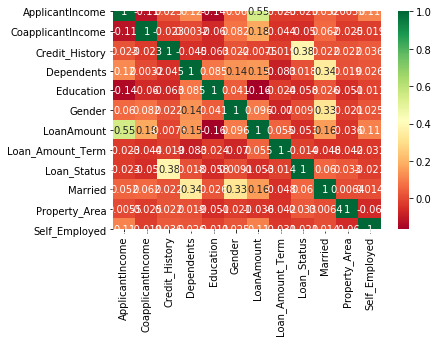

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
print(top_corr_features)
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### dropping unneccesary columns

In [35]:
drp=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area']
data.drop(drp,inplace=True, axis=1)

In [37]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_ID,Loan_Status
0,5849,0.0,1.0,142.51153,LP001002,1
1,4583,1508.0,1.0,128.00000,LP001003,0
2,3000,0.0,1.0,66.00000,LP001005,1
3,2583,2358.0,1.0,120.00000,LP001006,1
4,6000,0.0,1.0,141.00000,LP001008,1


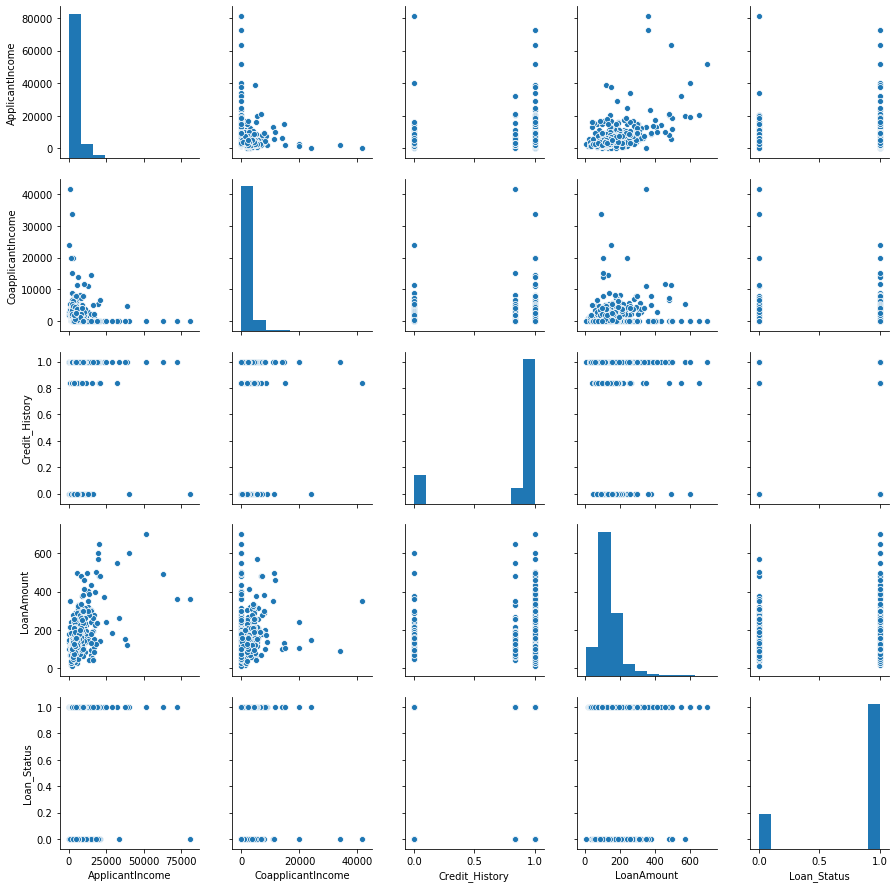

In [38]:
import seaborn as sns
sns.pairplot(data)

In [44]:
from sklearn import tree 
X = data.iloc[:,[0,1,2,3]]  #independent columns
y = data.iloc[:,5]
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors =4) 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.374)
knn.fit(x_train, y_train) 
pred = knn.predict(x_test) 


In [45]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 


0.7411444141689373
[[ 14  55]
 [ 40 258]]
              precision    recall  f1-score   support

           0       0.26      0.20      0.23        69
           1       0.82      0.87      0.84       298

    accuracy                           0.74       367
   macro avg       0.54      0.53      0.54       367
weighted avg       0.72      0.74      0.73       367



In [46]:
print(len(pred))

367


### submission file

In [49]:
test1= pd.read_csv(r'C:\Users\Prasad\Downloads\test_lAUu6dG.csv')
loan_id=test1['Loan_ID']
loan_status=pred

In [51]:
submission=pd.DataFrame({'Loan_ID':loan_id,'Loan_Status':loan_status})
submission.to_csv('class.csv',index=False)